In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import csv

In [ ]:
# Read in image names
#numimages = 1500
#images = []
#imagenames = []
#count = 0
#imagepath = "/content/drive/MyDrive/DS4002 Project 2 Data/images/"
#for file in os.listdir(imagepath):
#  if file.endswith(".jpg"):
#    count += 1
#    imagenames.append(file)
#    if count == numimages:
#      break
# imagenames

In [ ]:
# Write image names to csv
#imagenames[1:5]
#with open("/content/drive/MyDrive/DS4002 Project 2 Data/image_names.csv", "w") as f:
  #write = csv.writer(f, quoting=csv.QUOTE_ALL)
  #write.writerow(imagenames)

In [ ]:
# count = 0
# for name in imagenames:
#   image = Image.open(imagepath + name)
#   image = image.resize((30,30))
#   image = np.array(image)
#   images.append(image)
#   count += 1
#   #print(count)

In [ ]:
# data = np.array(images)

In [ ]:
# print(data.shape)

In [ ]:
#nrows = 4
#ncols = 4
#pic_index=8
#next_image = [os.path.join(imagepath, fname)
#for fname in imagenames[pic_index-8:pic_index]]

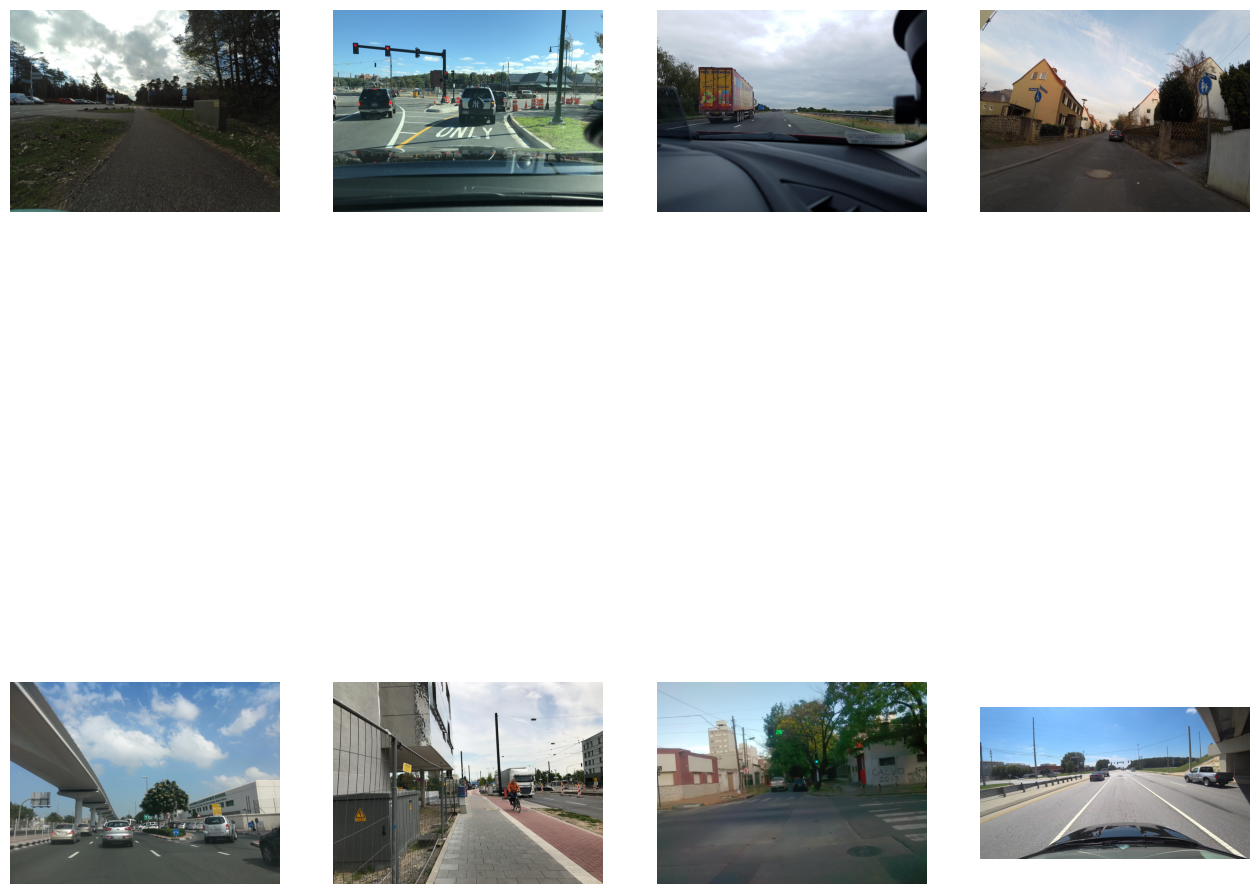

In [ ]:
#import matplotlib.pyplot as plt
#def show_image_sample(pic_directory):
#  fig = plt.gcf()
#  fig.set_size_inches(ncols * 4, nrows * 4)
#  count = 241
#  for img in next_image:
#    image = Image.open(img)
#    sp = plt.subplot(count)
#    sp.axis('Off')
#    plt.imshow(image)
#    count = count + 1
#  plt.show()
#show_image_sample(imagepath)

In [ ]:
import json
import os
import cv2
import pandas as pd

#json_file = "/content/drive/MyDrive/DS4002 Project 2 Data/mtsd_v2_fully_annotated/annotations/"
#csv_file = pd.read_csv("/content/drive/MyDrive/DS4002 Project 2 Data/image_names.csv")
#image_file = "/content/drive/MyDrive/DS4002 Project 2 Data/images/"
#image_names = csv_file.transpose()
#image_names = image_names.str.replace('.jpg', '',regex=True)
#image_names
# https://stackoverflow.com/questions/55581627/loop-through-multiple-json-input-files

#for file in os.listdir(json_file):
#  file2 = file.replace('.json','.jpg')
#  if file2 in csv_file:
#    file_path = os.path.join(json_file, file)
#    newfile_path = os.path.join("/content/drive/MyDrive/DS4002 Project 2 Data/annotationsubset/", file)
#    os.rename(file_path, newfile_path)

#newimagepath = "/content/drive/MyDrive/DS4002 Project 2 Data/annotationsubset/"
#len(os.listdir(newimagepath))

In [ ]:
#csv_file = pd.read_csv("/content/drive/MyDrive/DS4002 Project 2 Data/image_names1.csv")
#newfile_path = "/content/drive/MyDrive/DS4002 Project 2 Data/annotationsubset/"
#image_names = csv_file.transpose()
#count = 0

#for file in os.listdir(newfile_path):
#  file2 = file.replace('.json','.jpg')
#  if file2 not in csv_file:
#    os.remove(os.path.join(newfile_path,file))

In [ ]:
import csv
width = []
height = []
signs = []
files = []
bbox = []
files1 = []
count = 0
notnull = 0
image_subset_file = "/content/drive/MyDrive/DS4002 Project 2 Data/annotationsubset/"
for file in os.listdir(image_subset_file):
    files.append(os.path.join(image_subset_file, file))

for file in files:
  # file = file.replace('.jpg','.json')
  with open(file) as json_data:
    annotation = json.load(json_data)
    current_sign = []
    objects = annotation['objects']
    if len(objects) > 0: # only adding annotations with labels
      files1.append(file)
      notnull += 1
      height.append(annotation["height"])
      width.append(annotation["width"])
      for obj in objects:
        current_sign.append(obj['label'])
        box = obj['bbox']
        if count <= 8:
          bbox.append(box)
          count+=1
      signs.append(current_sign)
    # print(notnull)

In [ ]:
len(files1)

1498

In [ ]:
image_subset_path = "/content/drive/MyDrive/DS4002 Project 2 Data/imagesubset/"
images = []
count = 0
for file in os.listdir(image_subset_path):
  if (image_subset_file + file[:-4] + ".json") in files1:
    image = Image.open(image_subset_path + file)
    image = image.resize((30,30))
    image = np.array(image)
    images.append(image)
    count += 1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
image_data = np.array(images)
print(image_data.shape)

(1498, 30, 30, 3)


In [ ]:
#number of unique signs
signs1 = []
for subarr in signs:
  for i in range(len(subarr)):
    if subarr[i] not in signs1:
      signs1.append(subarr[i])
len(signs1)

342

In [ ]:
signs1 = [sublist[0] for sublist in signs if len(sublist) > 0] # limiting to one label per image
len(signs1)

1498

In [ ]:
sign_labels = np.array(signs1, dtype='object')
# print(sign_labels)

In [ ]:
len(image_data)

1498

In [ ]:
image_data.shape

(1498, 30, 30, 3)

In [ ]:
sign_labels.shape

(1498,)

In [178]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
X_train, X_test, y_train, y_test = train_test_split(image_data, sign_labels, test_size=0.3, random_state=47) # random state 47 gives same num label classes
print(image_data.shape, sign_labels.shape)
print(X_train.shape, X_test.shape)
label_encoder = LabelEncoder()
y_train_int_labels = label_encoder.fit_transform(y_train)
y_test_int_labels = label_encoder.fit_transform(y_test)
print(len(np.unique(y_train_int_labels)))
print(len(np.unique(y_test_int_labels)))

(1498, 30, 30, 3) (1498,)
(1048, 30, 30, 3) (450, 30, 30, 3)
209
137


In [179]:
y_train = to_categorical(y_train_int_labels, 209)
y_test = to_categorical(y_test_int_labels, 209)

In [ ]:
from keras.utils import to_categorical#to convert the labels present in y_train and t_test into one-hot encoding
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout#to create CNN

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(209, activation='softmax'))

In [180]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1048, 30, 30, 3) (450, 30, 30, 3) (1048, 209) (450, 209)


In [181]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# eps = 15
eps = 45
anc = model.fit(X_train, y_train, batch_size=32, epochs=eps)
# model.save("my_model.h5")

Epoch 1/45
33/33 [==============================] - 9s 225ms/step - loss: 2.3599 - accuracy: 0.4962
Epoch 2/45
33/33 [==============================] - 4s 109ms/step - loss: 2.2493 - accuracy: 0.5029
Epoch 3/45
33/33 [==============================] - 4s 117ms/step - loss: 2.1386 - accuracy: 0.5153
Epoch 4/45
33/33 [==============================] - 6s 169ms/step - loss: 2.0854 - accuracy: 0.5286
Epoch 5/45
33/33 [==============================] - 4s 110ms/step - loss: 2.0481 - accuracy: 0.5191
Epoch 6/45
33/33 [==============================] - 4s 110ms/step - loss: 2.0086 - accuracy: 0.5382
Epoch 7/45
33/33 [==============================] - 5s 149ms/step - loss: 1.9197 - accuracy: 0.5372
Epoch 8/45
33/33 [==============================] - 4s 135ms/step - loss: 1.8654 - accuracy: 0.5487
Epoch 9/45
33/33 [==============================] - 4s 113ms/step - loss: 1.7770 - accuracy: 0.5611
Epoch 10/45
33/33 [==============================] - 4s 112ms/step - loss: 1.7341 - accuracy: 0.5802

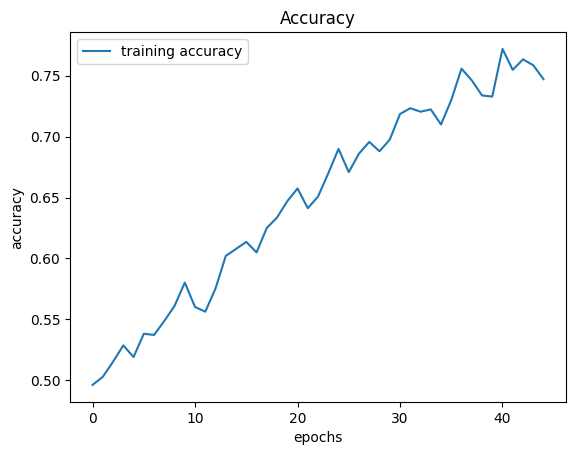

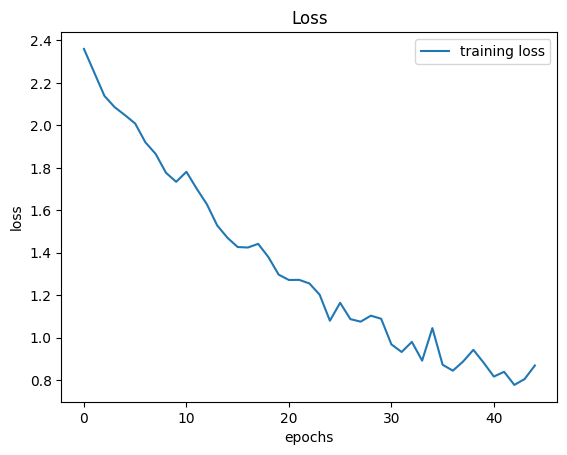

In [182]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [183]:
pred = model.predict(X_test)
#Accuracy with the test data



15/15 [==============================] - 1s 28ms/step


In [184]:
from sklearn.metrics import accuracy_score
pred = np.argmax(pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [185]:
print(accuracy_score(y_test, pred))

0.015555555555555555
